# Employment by economic activity

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join('datasets', 'Employment.csv')
df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,1,"Total, all countries or areas",2005,Employment by industry: Agriculture (%) Male a...,37.0,Estimate.,"International Labour Organization (ILO), Genev...",NaN,NaN,NaN
1,1,"Total, all countries or areas",2005,Employment by industry: Industry (%) Male and ...,21.2,Estimate.,"International Labour Organization (ILO), Genev...",NaN,NaN,NaN
2,1,"Total, all countries or areas",2005,Employment by industry: Services (%) Male and ...,41.8,Estimate.,"International Labour Organization (ILO), Genev...",NaN,NaN,NaN
3,1,"Total, all countries or areas",2005,Employment by industry: Agriculture (%) Male,37.3,Estimate.,"International Labour Organization (ILO), Genev...",NaN,NaN,NaN
4,1,"Total, all countries or areas",2005,Employment by industry: Industry (%) Male,24.2,Estimate.,"International Labour Organization (ILO), Genev...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7960,97,European Union (EU),2020,Employment by industry: Industry (%) Male,33.7,Estimate.,"International Labour Organization (ILO), Genev...",NaN,NaN,NaN
7961,97,European Union (EU),2020,Employment by industry: Services (%) Male,61.6,Estimate.,"International Labour Organization (ILO), Genev...",NaN,NaN,NaN
7962,97,European Union (EU),2020,Employment by industry: Agriculture (%) Female,2.7,Estimate.,"International Labour Organization (ILO), Genev...",NaN,NaN,NaN
7963,97,European Union (EU),2020,Employment by industry: Industry (%) Female,11.9,Estimate.,"International Labour Organization (ILO), Genev...",NaN,NaN,NaN


In [5]:
df.shape

(7965, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7965 entries, 0 to 7964
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region/Country/Area  7965 non-null   int64  
 1   Unnamed: 1           7965 non-null   object 
 2   Year                 7965 non-null   int64  
 3   Series               7965 non-null   object 
 4   Value                7965 non-null   float64
 5   Footnotes            5508 non-null   object 
 6   Source               7965 non-null   object 
 7   Unnamed: 7           168 non-null    object 
 8   Unnamed: 8           36 non-null     object 
 9   Unnamed: 9           3 non-null      object 
dtypes: float64(1), int64(2), object(7)
memory usage: 622.4+ KB


In [7]:
df.rename(columns={'Region/Country/Area': 'Code', 
                   'Unnamed: 1': 'Region/Country/Area',
                   }, inplace=True)

df.head()

,Code,Region/Country/Area,Year,Series,Value,Footnotes,Source,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,1,"Total, all countries or areas",2005,Employment by industry: Agriculture (%) Male a...,37.0,Estimate.,"International Labour Organization (ILO), Genev...",NaN,NaN,NaN
1,1,"Total, all countries or areas",2005,Employment by industry: Industry (%) Male and ...,21.2,Estimate.,"International Labour Organization (ILO), Genev...",NaN,NaN,NaN
2,1,"Total, all countries or areas",2005,Employment by industry: Services (%) Male and ...,41.8,Estimate.,"International Labour Organization (ILO), Genev...",NaN,NaN,NaN
3,1,"Total, all countries or areas",2005,Employment by industry: Agriculture (%) Male,37.3,Estimate.,"International Labour Organization (ILO), Genev...",NaN,NaN,NaN
4,1,"Total, all countries or areas",2005,Employment by industry: Industry (%) Male,24.2,Estimate.,"International Labour Organization (ILO), Genev...",NaN,NaN,NaN


In [8]:
df1 = df[['Code', 'Region/Country/Area', 'Year', 'Series', 'Value']]
df1

,Code,Region/Country/Area,Year,Series,Value
0,1,"Total, all countries or areas",2005,Employment by industry: Agriculture (%) Male a...,37.0
1,1,"Total, all countries or areas",2005,Employment by industry: Industry (%) Male and ...,21.2
2,1,"Total, all countries or areas",2005,Employment by industry: Services (%) Male and ...,41.8
3,1,"Total, all countries or areas",2005,Employment by industry: Agriculture (%) Male,37.3
4,1,"Total, all countries or areas",2005,Employment by industry: Industry (%) Male,24.2
...,...,...,...,...,...
7960,97,European Union (EU),2020,Employment by industry: Industry (%) Male,33.7
7961,97,European Union (EU),2020,Employment by industry: Services (%) Male,61.6
7962,97,European Union (EU),2020,Employment by industry: Agriculture (%) Female,2.7
7963,97,European Union (EU),2020,Employment by industry: Industry (%) Female,11.9


In [9]:
df1.shape

(7965, 5)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7965 entries, 0 to 7964
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Code                 7965 non-null   int64  
 1   Region/Country/Area  7965 non-null   object 
 2   Year                 7965 non-null   int64  
 3   Series               7965 non-null   object 
 4   Value                7965 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 311.3+ KB


In [11]:
df1.describe(include='object')

,Region/Country/Area,Series
count,7965,7965
unique,241,9
top,"Total, all countries or areas",Employment by industry: Industry (%) Male and ...
freq,36,898


In [12]:
df1['Region/Country/Area'].value_counts()

Total, all countries or areas    36
Portugal                         36
Mauritania                       36
Mauritius                        36
Mexico                           36
                                 ..
Guadeloupe                        5
French Guiana                     4
British Virgin Islands            3
Northern Mariana Islands          3
Marshall Islands                  3
Name: Region/Country/Area, Length: 241, dtype: int64

In [13]:
df1['Series'].value_counts()

Employment by industry: Industry (%) Male and Female       898
Employment by industry: Services (%) Male and Female       898
Employment by industry: Agriculture (%) Male and Female    895
Employment by industry: Agriculture (%) Male               879
Employment by industry: Industry (%) Male                  879
Employment by industry: Services (%) Male                  879
Employment by industry: Agriculture (%) Female             879
Employment by industry: Industry (%) Female                879
Employment by industry: Services (%) Female                879
Name: Series, dtype: int64

In [14]:
df1['Code'].value_counts()

1      36
620    36
478    36
480    36
484    36
       ..
312     5
254     4
92      3
580     3
584     3
Name: Code, Length: 241, dtype: int64

# Data Cleaning

In [15]:
df1['Region/Country/Area'].replace(
    {'C�te d�Ivoire': "Côte d'Ivoire", 
    'Cura�ao': 'Curaçao',
    'R�union': 'Réunion'}, inplace=True
)

df1['Region/Country/Area'].unique()

array(['Total, all countries or areas', 'Africa', 'Northern Africa',
       'Sub-Saharan Africa', 'Eastern Africa', 'Southern Africa',
       'Western Africa', 'Americas', 'Northern America',
       'Latin America & the Caribbean', 'Caribbean', 'Central America',
       'South America', 'Central Asia', 'Eastern Asia',
       'South-eastern Asia', 'Southern Asia', 'Western Asia', 'Caucasus',
       'Eastern Europe', 'Northern Europe', 'Southern Europe',
       'Western Europe', 'Afghanistan', 'Albania', 'Algeria',
       'American Samoa', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurin. State of)', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia'

In [16]:
df1['Year'].value_counts()

2010    1972
2005    1959
2015    1908
2020    1908
2001      45
2011      36
2012      35
2000      33
2008      27
2013      21
2004       9
2006       9
2002       3
Name: Year, dtype: int64

In [17]:
df1['Value'].describe()

count    7965.000000
mean       33.306265
std        24.861843
min         0.000000
25%        12.400000
50%        27.400000
75%        51.100000
max        98.500000
Name: Value, dtype: float64

# Missing Values Exploration

In [18]:
df1.isna().sum()

Code                   0
Region/Country/Area    0
Year                   0
Series                 0
Value                  0
dtype: int64

# Grouping and Aggregation

Filter By Region

In [19]:
regions = ['Africa', 'Northern Africa','Sub-Saharan Africa', 'Eastern Africa', 'Southern Africa', 'Western Africa', 'Americas', 
           'Northern America', 'Latin America & the Caribbean', 'Caribbean', 'Central America', 'South America', 'Central Asia',
           'Eastern Asia', 'South-eastern Asia', 'Southern Asia', 'Western Asia', 'Caucasus', 'Eastern Europe', 'Northern Europe', 
           'Southern Europe', 'Western Europe']

df_reg_filt = df1[df1['Region/Country/Area'].isin(regions)]
df_reg_filt

,Code,Region/Country/Area,Year,Series,Value
36,2,Africa,2005,Employment by industry: Agriculture (%) Male a...,56.6
37,2,Africa,2005,Employment by industry: Industry (%) Male and ...,11.6
38,2,Africa,2005,Employment by industry: Services (%) Male and ...,31.8
39,2,Africa,2005,Employment by industry: Agriculture (%) Male,53.1
40,2,Africa,2005,Employment by industry: Industry (%) Male,14.5
...,...,...,...,...,...
823,155,Western Europe,2020,Employment by industry: Industry (%) Male,33.5
824,155,Western Europe,2020,Employment by industry: Services (%) Male,64.2
825,155,Western Europe,2020,Employment by industry: Agriculture (%) Female,1.2
826,155,Western Europe,2020,Employment by industry: Industry (%) Female,10.9


In [20]:
df_reg_filt.rename(columns={
    'Region/Country/Area': 'Region'
}, inplace=True)

df_reg_filt

,Code,Region,Year,Series,Value
36,2,Africa,2005,Employment by industry: Agriculture (%) Male a...,56.6
37,2,Africa,2005,Employment by industry: Industry (%) Male and ...,11.6
38,2,Africa,2005,Employment by industry: Services (%) Male and ...,31.8
39,2,Africa,2005,Employment by industry: Agriculture (%) Male,53.1
40,2,Africa,2005,Employment by industry: Industry (%) Male,14.5
...,...,...,...,...,...
823,155,Western Europe,2020,Employment by industry: Industry (%) Male,33.5
824,155,Western Europe,2020,Employment by industry: Services (%) Male,64.2
825,155,Western Europe,2020,Employment by industry: Agriculture (%) Female,1.2
826,155,Western Europe,2020,Employment by industry: Industry (%) Female,10.9


Filter Employment by industry ==> Agriculture

In [21]:
emp_agr = ['Employment by industry: Agriculture (%) Male and Female', 
           'Employment by industry: Agriculture (%) Male',
           'Employment by industry: Agriculture (%) Female']

df_reg_filt_empagr = df_reg_filt[df_reg_filt['Series'].isin(emp_agr)]
df_reg_filt_empagr

,Code,Region,Year,Series,Value
36,2,Africa,2005,Employment by industry: Agriculture (%) Male a...,56.6
39,2,Africa,2005,Employment by industry: Agriculture (%) Male,53.1
42,2,Africa,2005,Employment by industry: Agriculture (%) Female,61.4
45,2,Africa,2010,Employment by industry: Agriculture (%) Male a...,53.4
48,2,Africa,2010,Employment by industry: Agriculture (%) Male,50.4
...,...,...,...,...,...
813,155,Western Europe,2015,Employment by industry: Agriculture (%) Male,2.7
816,155,Western Europe,2015,Employment by industry: Agriculture (%) Female,1.5
819,155,Western Europe,2020,Employment by industry: Agriculture (%) Male a...,1.8
822,155,Western Europe,2020,Employment by industry: Agriculture (%) Male,2.4


# Percentage Employed in the Agricultural Industry by Region Exploration

In [22]:
# bar plot helper function
def plot_bar(df, x, y, hue, xlabel=None, ylabel=None, main_title=None, leg_title=None, loc=None, leg_labels=None):

    # set plot theme
    sns.set_theme(style='white', context='talk')

    # Initialize the matplotlib figure
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot bar chart
    sns.barplot(
        x=x, y=y, 
        hue=hue, data=df, ci=None, 
        ax=ax
    )

    # despine axes
    sns.despine(left=True, bottom=True)

    # matplotlib axis label
    ax.set(xlabel=xlabel, ylabel=ylabel, title=main_title)

    # label legend
    plt.legend(title=leg_title, loc=loc, labels=leg_labels)

    return plot_bar

Filter Africa and Americas Continents

In [23]:
continents = ['Africa', 'Americas']

continents_df = df_reg_filt_empagr[df_reg_filt_empagr['Region'].isin(continents)]
continents_df.head()

,Code,Region,Year,Series,Value
36,2,Africa,2005,Employment by industry: Agriculture (%) Male a...,56.6
39,2,Africa,2005,Employment by industry: Agriculture (%) Male,53.1
42,2,Africa,2005,Employment by industry: Agriculture (%) Female,61.4
45,2,Africa,2010,Employment by industry: Agriculture (%) Male a...,53.4
48,2,Africa,2010,Employment by industry: Agriculture (%) Male,50.4


<function __main__.plot_bar(df, x, y, hue, xlabel=None, ylabel=None, main_title=None, leg_title=None, loc=None, leg_labels=None)>

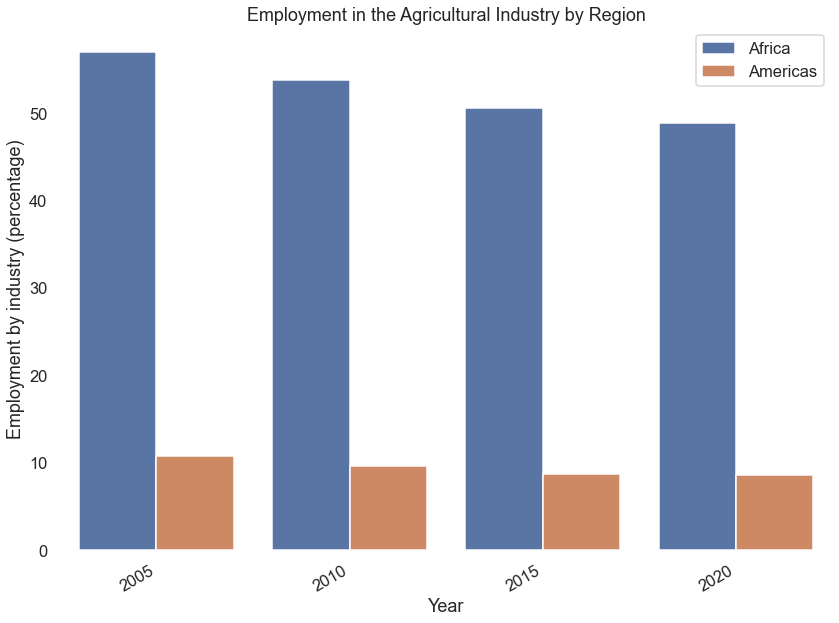

In [24]:
plot_bar(df=continents_df,
         x='Year', y='Value', 
         hue='Region', 
         xlabel='Year', ylabel='Employment by industry (percentage)',
         main_title='Employment in the Agricultural Industry by Region')

<function __main__.plot_bar(df, x, y, hue, xlabel=None, ylabel=None, main_title=None, leg_title=None, loc=None, leg_labels=None)>

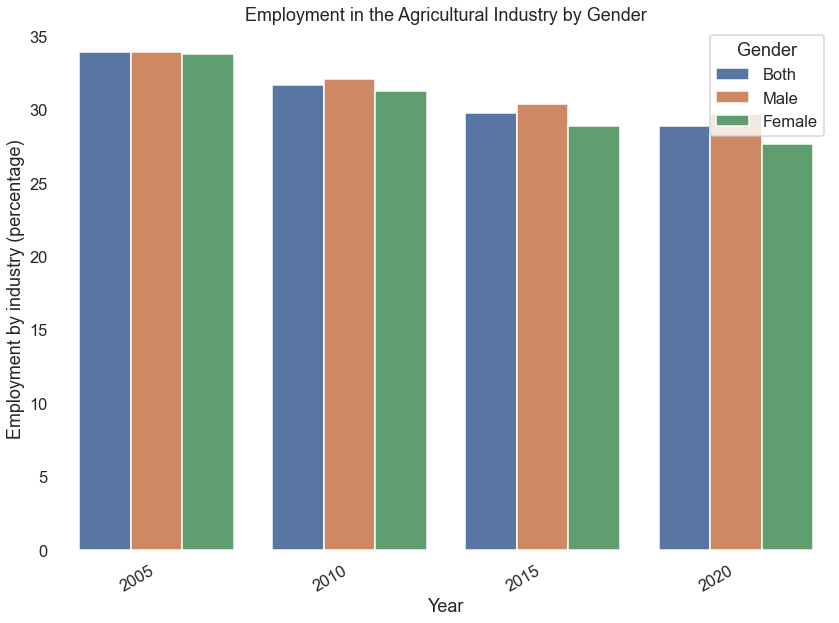

In [25]:
plot_bar(df=continents_df,
         x='Year', y='Value', 
         hue='Series', 
         xlabel='Year', ylabel='Employment by industry (percentage)',
         main_title='Employment in the Agricultural Industry by Gender', 
         leg_title='Gender', loc=1, leg_labels=['Both', 'Male', 'Female'])

Filter Employment by industry ==> Industry

In [26]:
emp_ind = ['Employment by industry: Industry (%) Male and Female', 
           'Employment by industry: Industry (%) Male',
           'Employment by industry: Industry (%) Female']

df_reg_filt_empind = df_reg_filt[df_reg_filt['Series'].isin(emp_ind)]
df_reg_filt_empind

,Code,Region,Year,Series,Value
37,2,Africa,2005,Employment by industry: Industry (%) Male and ...,11.6
40,2,Africa,2005,Employment by industry: Industry (%) Male,14.5
43,2,Africa,2005,Employment by industry: Industry (%) Female,7.7
46,2,Africa,2010,Employment by industry: Industry (%) Male and ...,12.2
49,2,Africa,2010,Employment by industry: Industry (%) Male,15.6
...,...,...,...,...,...
814,155,Western Europe,2015,Employment by industry: Industry (%) Male,34.6
817,155,Western Europe,2015,Employment by industry: Industry (%) Female,11.2
820,155,Western Europe,2020,Employment by industry: Industry (%) Male and ...,22.9
823,155,Western Europe,2020,Employment by industry: Industry (%) Male,33.5


# Percentage Employed in the Industries by Region Exploration

Filter Africa and Americas Continents

In [27]:
continents = ['Africa', 'Americas']

continents_df1 = df_reg_filt_empind[df_reg_filt_empind['Region'].isin(continents)]
continents_df1.head()

,Code,Region,Year,Series,Value
37,2,Africa,2005,Employment by industry: Industry (%) Male and ...,11.6
40,2,Africa,2005,Employment by industry: Industry (%) Male,14.5
43,2,Africa,2005,Employment by industry: Industry (%) Female,7.7
46,2,Africa,2010,Employment by industry: Industry (%) Male and ...,12.2
49,2,Africa,2010,Employment by industry: Industry (%) Male,15.6


<function __main__.plot_bar(df, x, y, hue, xlabel=None, ylabel=None, main_title=None, leg_title=None, loc=None, leg_labels=None)>

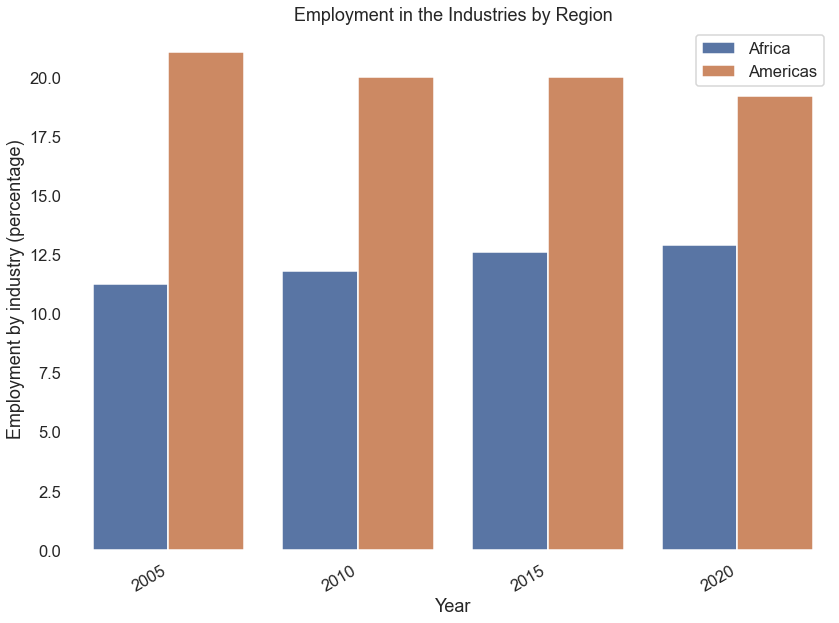

In [28]:
plot_bar(df=continents_df1,
         x='Year', y='Value', 
         hue='Region', 
         xlabel='Year', ylabel='Employment by industry (percentage)',
         main_title='Employment in the Industries by Region')

<function __main__.plot_bar(df, x, y, hue, xlabel=None, ylabel=None, main_title=None, leg_title=None, loc=None, leg_labels=None)>

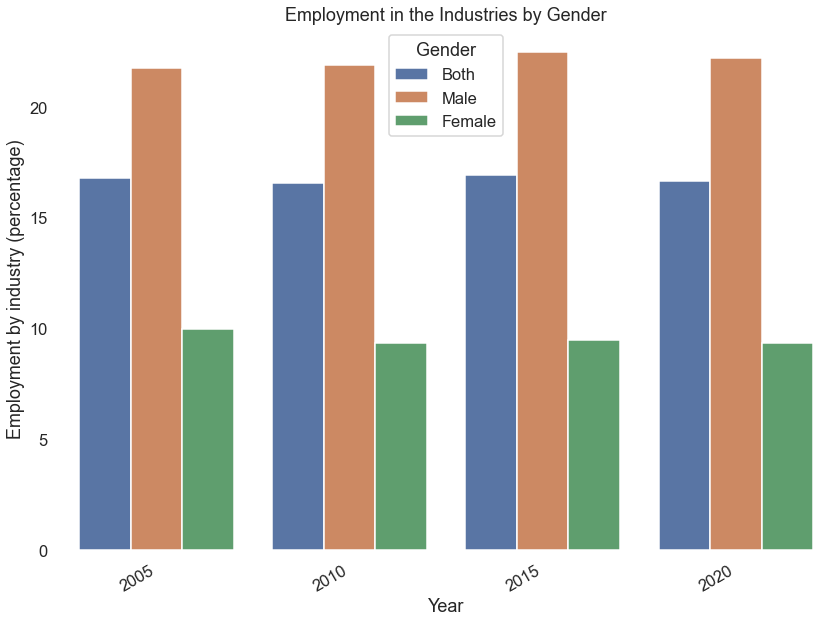

In [29]:
plot_bar(df=continents_df1,
         x='Year', y='Value', 
         hue='Series', 
         xlabel='Year', ylabel='Employment by industry (percentage)',
         main_title='Employment in the Industries by Gender', 
         leg_title='Gender', loc=9, leg_labels=['Both', 'Male', 'Female'])

Filter Employment by industry ==> Services

In [30]:
emp_ser = ['Employment by industry: Services (%) Male and Female', 
           'Employment by industry: Services (%) Male',
           'Employment by industry: Services (%) Female']

df_reg_filt_empser = df_reg_filt[df_reg_filt['Series'].isin(emp_ser)]
df_reg_filt_empser

,Code,Region,Year,Series,Value
38,2,Africa,2005,Employment by industry: Services (%) Male and ...,31.8
41,2,Africa,2005,Employment by industry: Services (%) Male,32.4
44,2,Africa,2005,Employment by industry: Services (%) Female,30.9
47,2,Africa,2010,Employment by industry: Services (%) Male and ...,34.3
50,2,Africa,2010,Employment by industry: Services (%) Male,34.0
...,...,...,...,...,...
815,155,Western Europe,2015,Employment by industry: Services (%) Male,62.7
818,155,Western Europe,2015,Employment by industry: Services (%) Female,87.3
821,155,Western Europe,2020,Employment by industry: Services (%) Male and ...,75.3
824,155,Western Europe,2020,Employment by industry: Services (%) Male,64.2


# Percentage Employed in Services by Region Exploration

Filter Africa and Americas Continents

In [31]:
continents = ['Africa', 'Americas']

continents_df2 = df_reg_filt_empser[df_reg_filt_empser['Region'].isin(continents)]
continents_df2.head()

,Code,Region,Year,Series,Value
38,2,Africa,2005,Employment by industry: Services (%) Male and ...,31.8
41,2,Africa,2005,Employment by industry: Services (%) Male,32.4
44,2,Africa,2005,Employment by industry: Services (%) Female,30.9
47,2,Africa,2010,Employment by industry: Services (%) Male and ...,34.3
50,2,Africa,2010,Employment by industry: Services (%) Male,34.0


<function __main__.plot_bar(df, x, y, hue, xlabel=None, ylabel=None, main_title=None, leg_title=None, loc=None, leg_labels=None)>

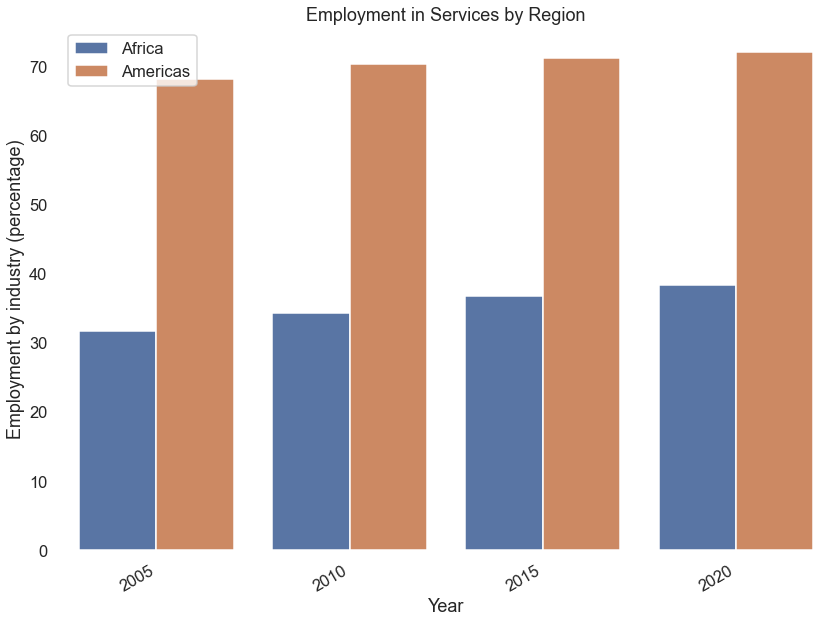

In [32]:
plot_bar(df=continents_df2,
         x='Year', y='Value', 
         hue='Region', 
         xlabel='Year', ylabel='Employment by industry (percentage)',
         main_title='Employment in Services by Region', loc=2)

<function __main__.plot_bar(df, x, y, hue, xlabel=None, ylabel=None, main_title=None, leg_title=None, loc=None, leg_labels=None)>

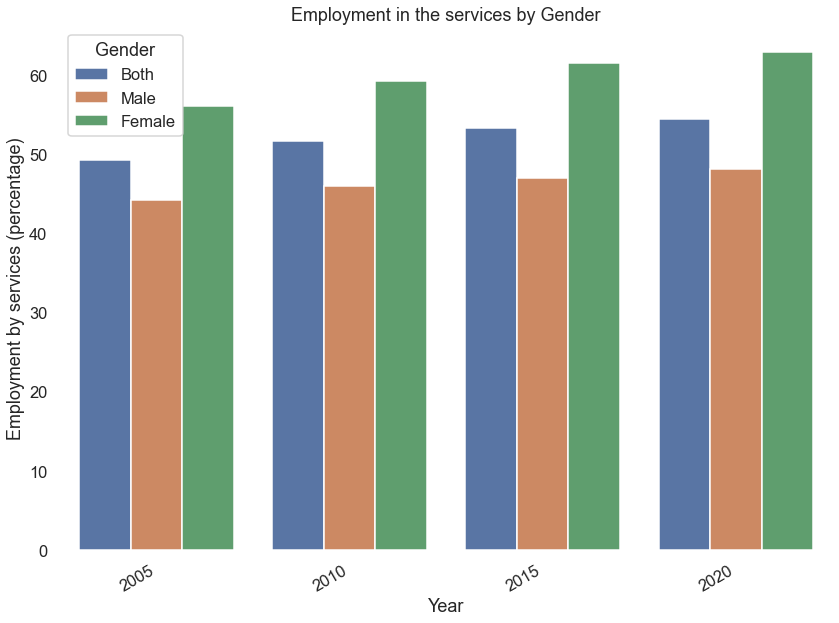

In [33]:
plot_bar(df=continents_df2,
         x='Year', y='Value', 
         hue='Series', 
         xlabel='Year', ylabel='Employment by services (percentage)',
         main_title='Employment in the services by Gender', 
         leg_title='Gender', loc=2, leg_labels=['Both', 'Male', 'Female'])